In [115]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC


## 1.1 Signal decomposition

Generating the three time series

In [116]:
TIMESTEPS = 300
f_1 = []
f_2 = []
f_3 = []
for t in range(TIMESTEPS):
    noise = np.random.normal(t, 1)
    f_1.append(np.sin(t) + 0.001*noise)
for t in range(TIMESTEPS):
    noise = np.random.normal(t, 1)
    f_2.append(2*(t-np.floor(t)) + 0.002*noise)
for t in range(TIMESTEPS):
    noise = np.random.normal(t, 1)
    f_3.append(0.01*t + 0.001*noise)

Generate random matrix

In [117]:
A = np.random.rand(3,3)

Compute transformed values

In [118]:
S = np.c_[f_1, f_2, f_3]
print(S)
X = np.dot(S, A)

[[-1.29469094e-03  1.45227986e-03  3.01665358e-04]
 [ 8.43376132e-01  1.35183644e-03  9.49198612e-03]
 [ 9.13090178e-01  5.69329123e-03  2.24715364e-02]
 [ 1.43883296e-01  5.13852632e-03  3.51844775e-02]
 [-7.53302917e-01  5.74229002e-03  4.32272496e-02]
 [-9.53743744e-01  1.43483380e-02  5.39859696e-02]
 [-2.73088076e-01  8.92981104e-03  6.40953161e-02]
 [ 6.62873681e-01  1.58035120e-02  7.53897916e-02]
 [ 9.96557425e-01  1.54107990e-02  8.74192712e-02]
 [ 4.20972269e-01  1.91805397e-02  9.86339387e-02]
 [-5.34601312e-01  1.89236880e-02  1.09473729e-01]
 [-9.88889059e-01  2.20065879e-02  1.20244660e-01]
 [-5.24351145e-01  2.40443808e-02  1.31528936e-01]
 [ 4.32781105e-01  2.79136560e-02  1.43544050e-01]
 [ 1.00402704e+00  2.71530225e-02  1.54284432e-01]
 [ 6.66130054e-01  2.94967947e-02  1.66317291e-01]
 [-2.72154565e-01  3.24231026e-02  1.75462025e-01]
 [-9.43319598e-01  3.54857098e-02  1.86679010e-01]
 [-7.33080353e-01  3.83642197e-02  1.97819576e-01]
 [ 1.68047386e-01  3.82976405e-

Using PCA and ICA

In [119]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X)

ica = FastICA(n_components=3)
ica_data = ica.fit_transform(X)


c:\Users\Valton\miniconda3\envs\machine_learning\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


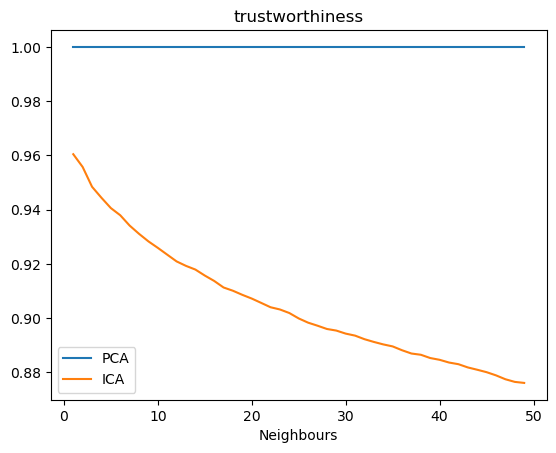

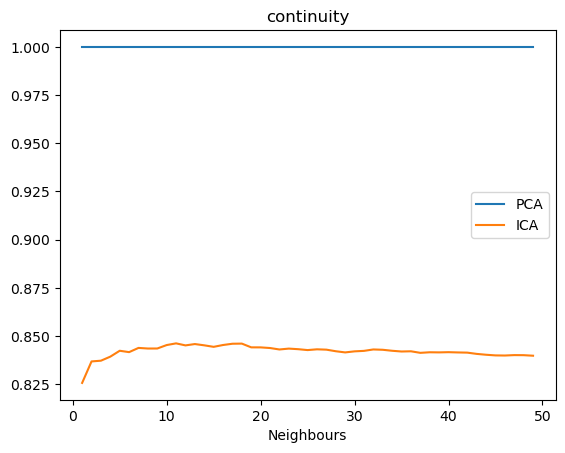

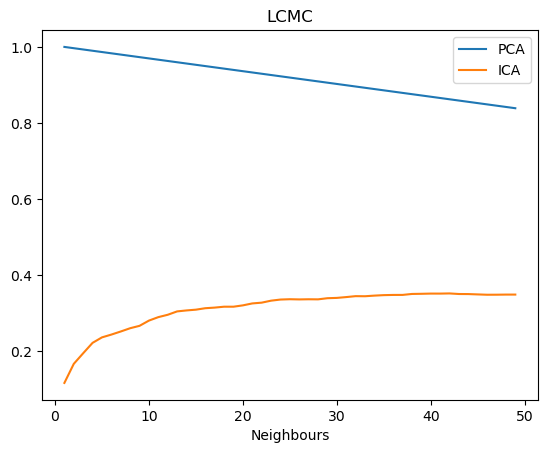

In [120]:

MAX_K = 50
Q = coranking.coranking_matrix(X, pca_data)
Q1 = coranking.coranking_matrix(X, ica_data)
# PCA
trust_pca = trustworthiness(Q, min_k=1, max_k=MAX_K)
cont_pca = continuity(Q, min_k=1, max_k=MAX_K)
lcmc_pca = LCMC(Q, min_k=1, max_k=MAX_K)
# ICA
trust_ica = trustworthiness(Q1, min_k=1, max_k=MAX_K)
cont_ica = continuity(Q1, min_k=1, max_k=MAX_K)
lcmc_ica = LCMC(Q1, min_k=1, max_k=MAX_K)

plt.plot(range(1,MAX_K), trust_pca, label='PCA')
plt.plot(range(1,MAX_K), trust_ica, label='ICA')
plt.title('trustworthiness')
plt.xlabel('Neighbours')
plt.legend()
plt.show()

plt.plot(range(1,MAX_K), cont_pca, label='PCA')
plt.plot(range(1,MAX_K), cont_ica, label='ICA')
plt.title('continuity')
plt.xlabel('Neighbours')
plt.legend()
plt.show()

plt.plot(range(1,MAX_K), lcmc_pca, label='PCA')
plt.plot(range(1,MAX_K), lcmc_ica, label='ICA')
plt.title('LCMC')
plt.xlabel('Neighbours')
plt.legend()
plt.show()


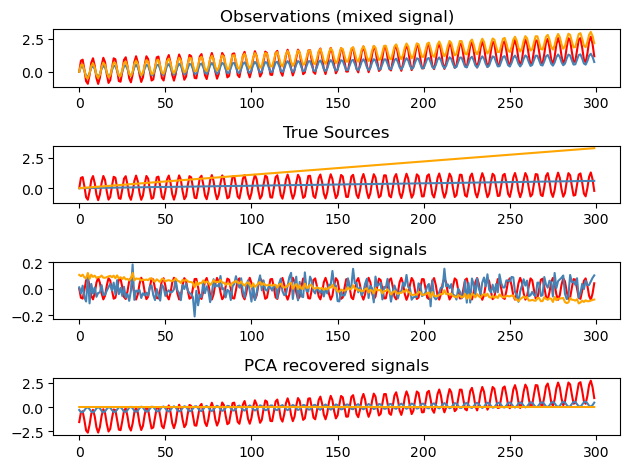

In [121]:
plt.figure()

models = [X, S, ica_data, pca_data]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

### Sources
https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py


https://coranking.readthedocs.io/en/latest/index.html#api-reference